In [34]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

In [35]:
data=pd.read_csv('mpg_raw.csv')

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [37]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [38]:
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [39]:
data['horsepower']=data['horsepower'].fillna(data['horsepower'].mean())
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [40]:
Q1=data['horsepower'].quantile(0.25)
Q3=data['horsepower'].quantile(0.75)
IQR=Q3-Q1
UF=Q3+(1.5*IQR)
LF=Q1-(1.5*IQR)

In [41]:
for hp in data['horsepower']:
    if hp>UF or hp<LF:
        hp=data['horsepower'].mean()

In [43]:
scaler=StandardScaler()
col=data.select_dtypes(include=['int64','float64']).columns
col=scaler.fit_transform(data[col])

<Axes: xlabel='horsepower', ylabel='Count'>

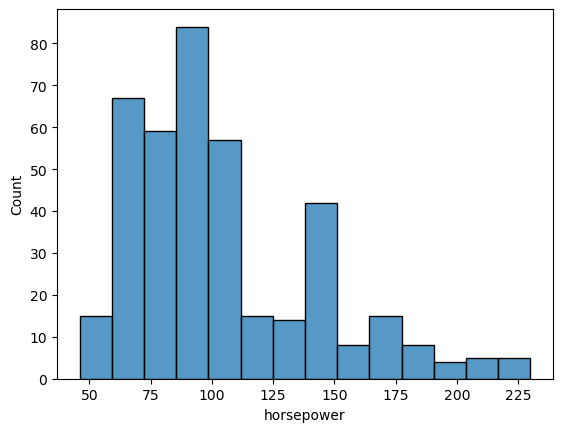

In [44]:
sb.histplot(data['horsepower'])

(array([ 27.,  95., 120.,  50.,  19.,  47.,  13.,  14.,   5.,   8.]),
 array([ 46. ,  64.4,  82.8, 101.2, 119.6, 138. , 156.4, 174.8, 193.2,
        211.6, 230. ]),
 <BarContainer object of 10 artists>)

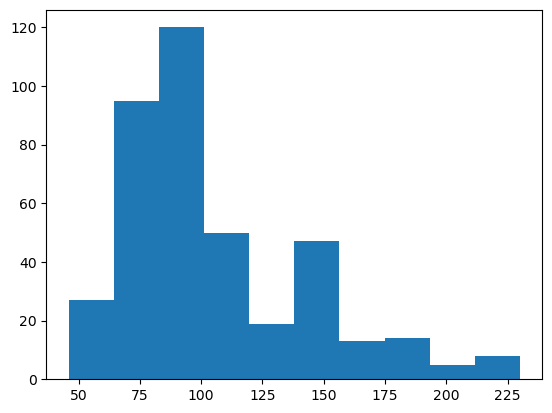

In [45]:
plt.hist(data['horsepower'])

<Axes: xlabel='cylinders', ylabel='mpg'>

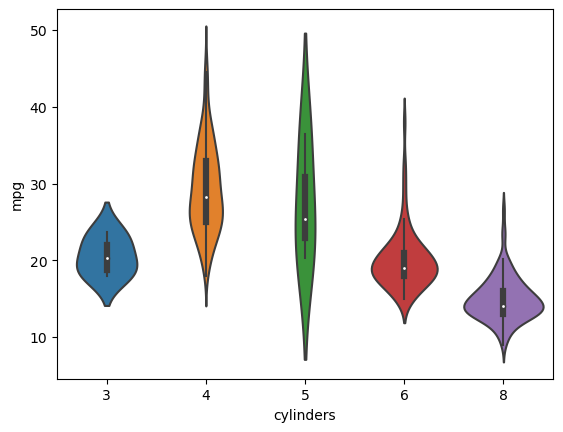

In [46]:
sb.violinplot(data=data,x='cylinders',y='mpg')

<Axes: xlabel='cylinders', ylabel='horsepower'>

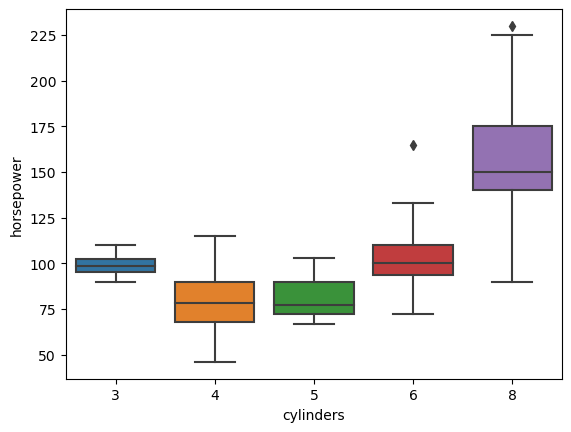

In [47]:
sb.boxplot(data=data,x='cylinders',y='horsepower')

C:\Users\aksha\AppData\Local\Temp\ipykernel_9324\2736794973.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(data.corr(method='spearman'),annot=True)


<Axes: >

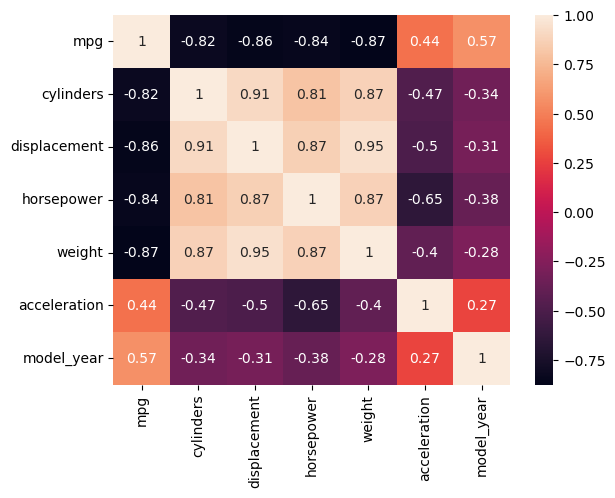

In [48]:
sb.heatmap(data.corr(method='spearman'),annot=True)

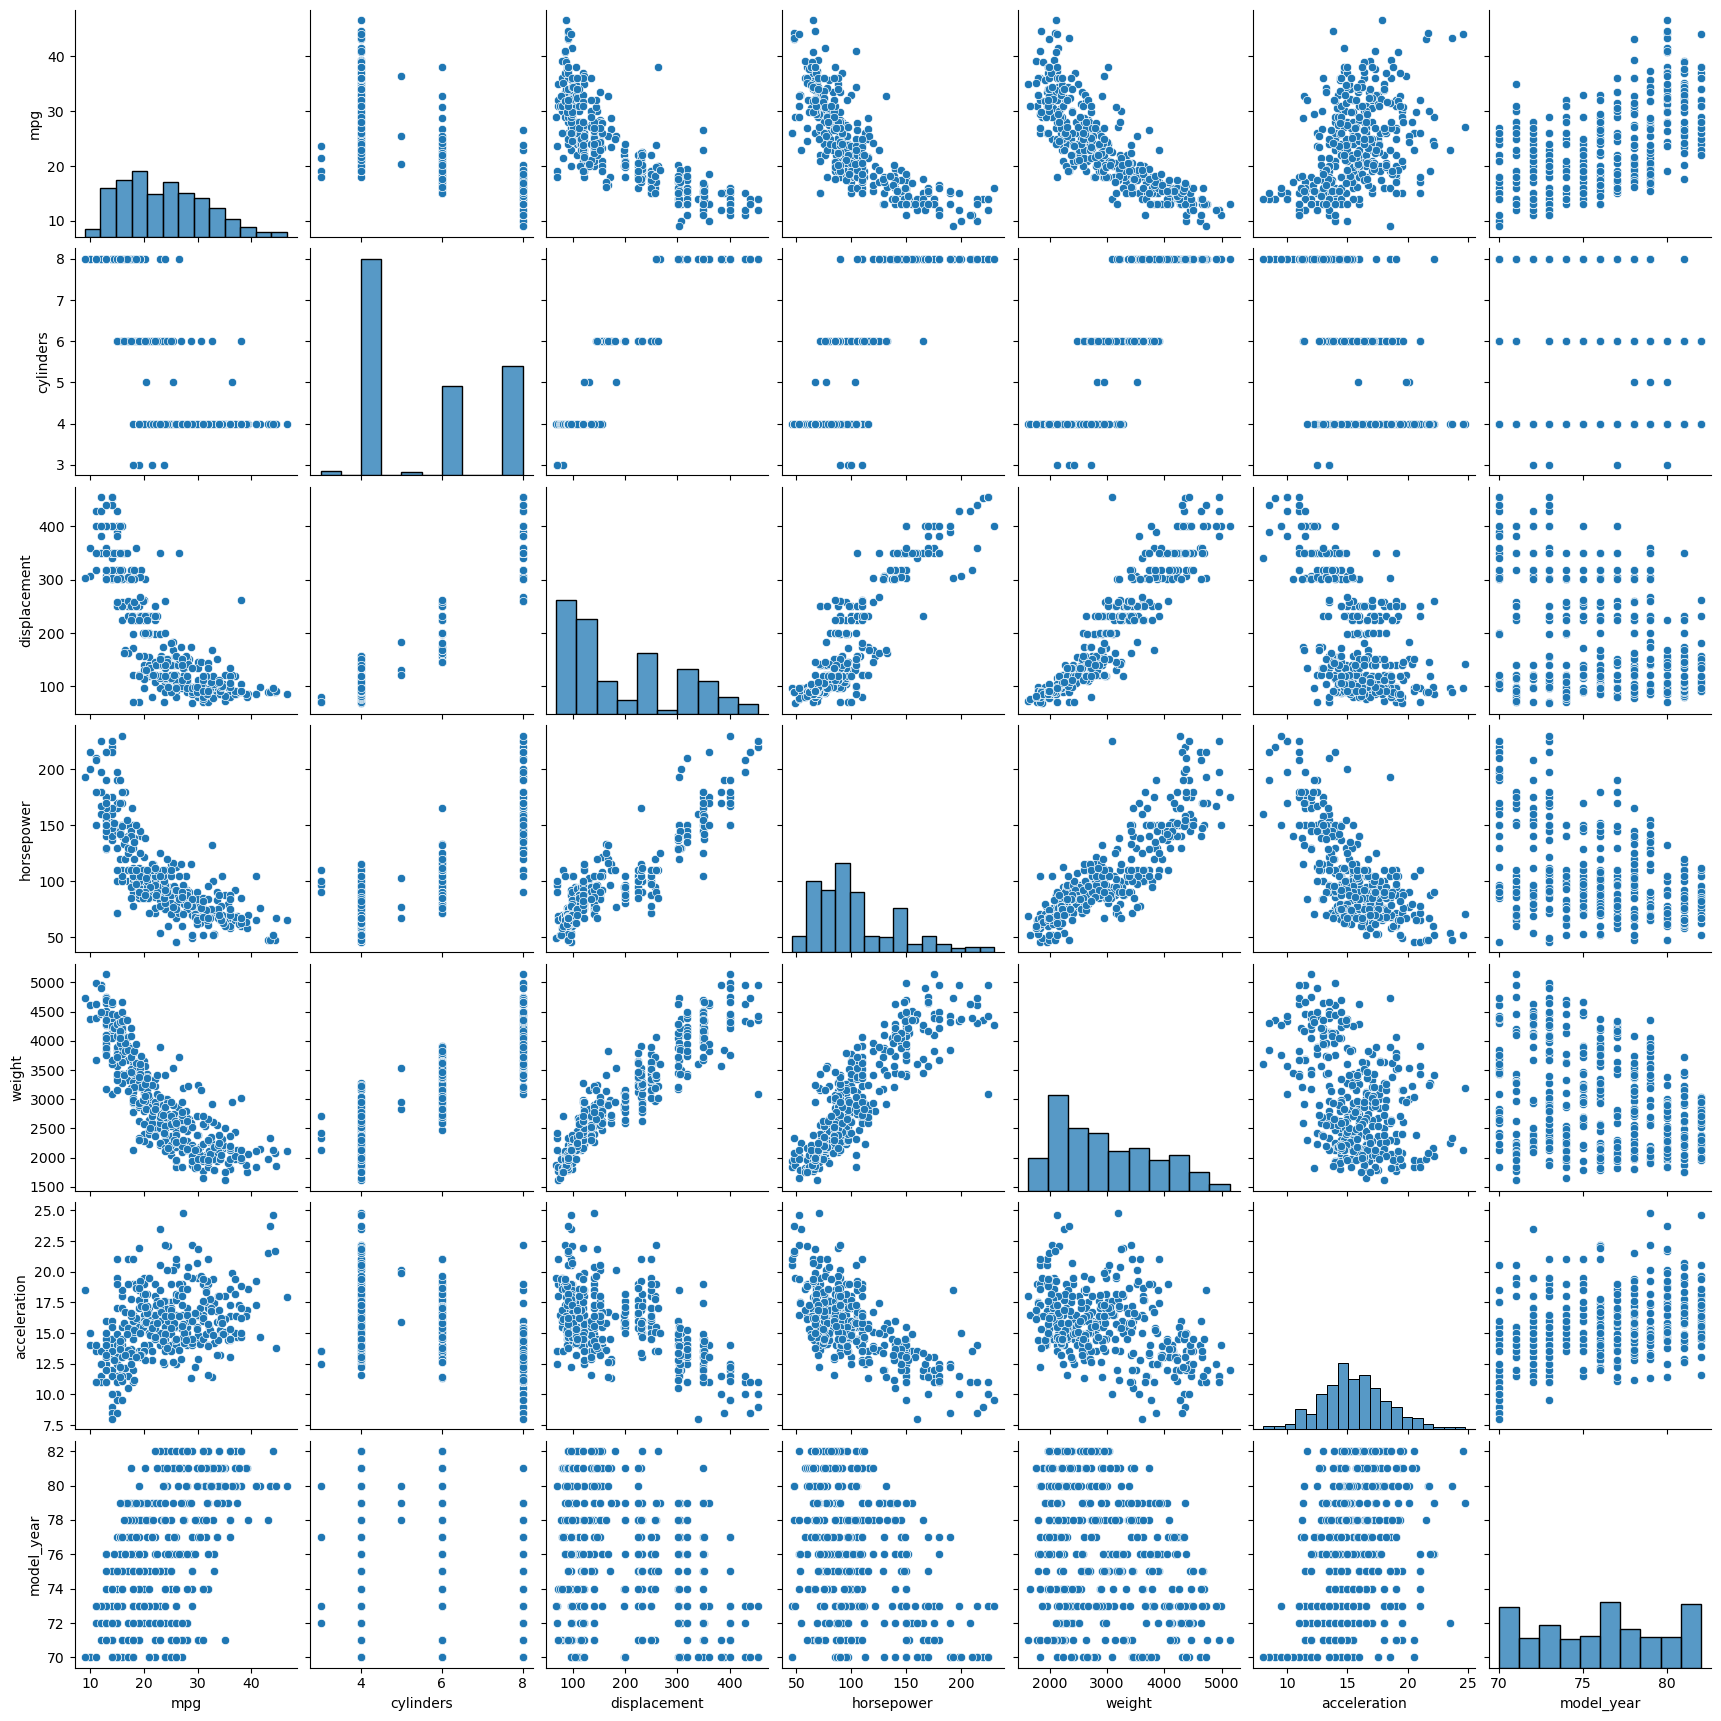

In [49]:
numerical=['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year']
sb.pairplot(data[numerical])